# Homework 5
## Solutions

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

import optuna
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import KFold, cross_val_predict, train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [31]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [32]:
df.describe().T.style.bar(subset=['mean'], color='#00BFFF').background_gradient(subset=['std'], cmap='Reds').background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


In [33]:
fig = px.histogram(df, 'Age',color="HeartDisease",  color_discrete_sequence=px.colors.sequential.RdBu,histfunc="count",
                   title='Age vs HeartDisease')

fig.show()



<AxesSubplot:>

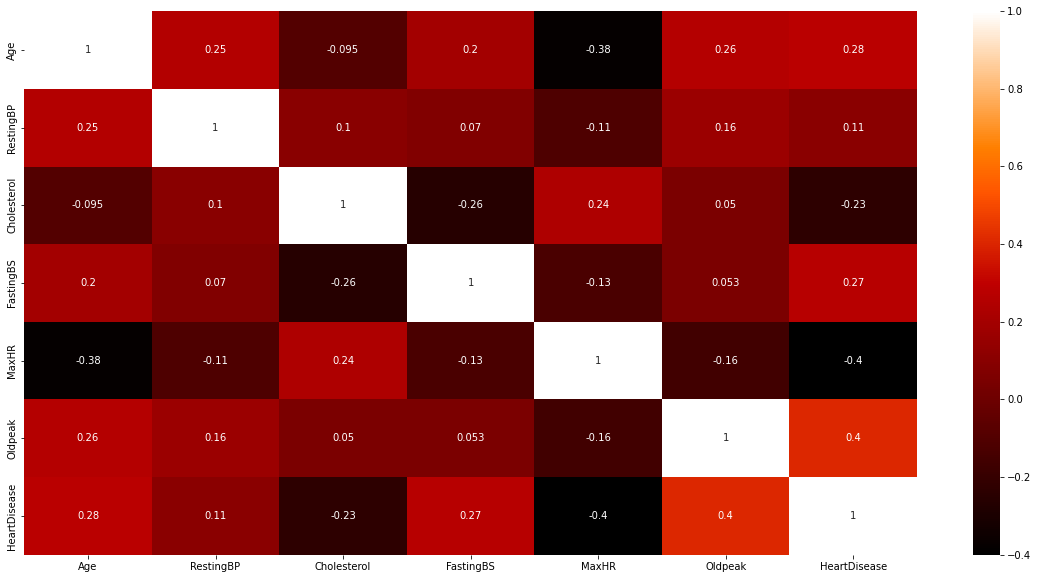

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap="gist_heat")

In [35]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Sex']=le.fit_transform(df['Sex'])
df['RestingECG']=le.fit_transform(df['RestingECG'])
df['ChestPainType']=le.fit_transform(df['ChestPainType'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df['ST_Slope']=le.fit_transform(df['ST_Slope'])

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [36]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)


X_train:  (642, 11)
X_test:  (276, 11)
y_train:  (642,)
y_test:  (276,)


In [38]:
accuracy =[]
model_names =[]
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lda= LinearDiscriminantAnalysis()
svm = SVC(gamma='scale')
knn = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=5)

ada = AdaBoostClassifier(random_state=0)
gb = GradientBoostingClassifier(random_state=0)
rf = RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=7, criterion='gini')
et=  ExtraTreesClassifier(random_state=0)

xgbc = XGBClassifier(random_state=0)
lgbmc=LGBMClassifier(random_state=0)

models = [lr,lda,svm,knn,ada,gb,rf,et,xgbc,lgbmc]

for model in models: 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),4))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),4)}')

model_names = ['Logistic','LinearDiscriminant','SVM','KNeighbors','Ada','Gradient','Random','ExtraTree','XGBoost','LightGBM']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
res = result_df1.sort_values('Accuracy',ascending = False)
res

model : LogisticRegression(multi_class='ovr', solver='liblinear') and  accuracy score is : 0.8696
model : LinearDiscriminantAnalysis() and  accuracy score is : 0.8587
model : SVC() and  accuracy score is : 0.7246
model : KNeighborsClassifier(algorithm='ball_tree') and  accuracy score is : 0.7138
model : AdaBoostClassifier(random_state=0) and  accuracy score is : 0.8659
model : GradientBoostingClassifier(random_state=0) and  accuracy score is : 0.8587
model : RandomForestClassifier(max_depth=7, max_features='log2', n_estimators=200,
                       random_state=42) and  accuracy score is : 0.8949
model : ExtraTreesClassifier(random_state=0) and  accuracy score is : 0.8804
[05:26:43] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
model : XGBClassifier(base_score=0.5, booster='gbtree', colsa

,Accuracy
Random,0.8949
ExtraTree,0.8804
Logistic,0.8696
Ada,0.8659
LightGBM,0.8623
LinearDiscriminant,0.8587
Gradient,0.8587
XGBoost,0.8478
SVM,0.7246
KNeighbors,0.7138


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighboursClassifier': KNeighborsClassifier(n_neighbors=5),
    'LogisticRegression': LogisticRegression()

}
params = {
    'RandomForestClassifier':{ 
            "n_estimators"      : [100, 200, 500, 1000],
            "max_features"      : ["auto", "sqrt", "log2"],
            "bootstrap": [True],
            "criterion": ['gini', 'entropy'],
            "oob_score": [True, False]
            },
    'KNeighboursClassifier': {
        'n_neighbors': np.arange(3, 15),
        'weights': ['uniform', 'distance'],
        'algorithm': ['ball_tree', 'kd_tree', 'brute']
        },
    'LogisticRegression': {
        'solver': ['newton-cg', 'sag', 'lbfgs'],
        'multi_class': ['ovr', 'multinomial']
        }  
}

In [40]:
from sklearn.model_selection import GridSearchCV

def fit(train_features, train_actuals):
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=5)
            gscv.fit(train_features, train_actuals)
            print("best parameters are: {}".format(gscv.best_estimator_))

In [40]:
fit(X_train, y_train)

best parameters are: RandomForestClassifier(max_features='log2')
best parameters are: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=6)
best parameters are: LogisticRegression(multi_class='ovr', solver='newton-cg')


In [61]:


from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns)

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

features.remove('HeartDisease')

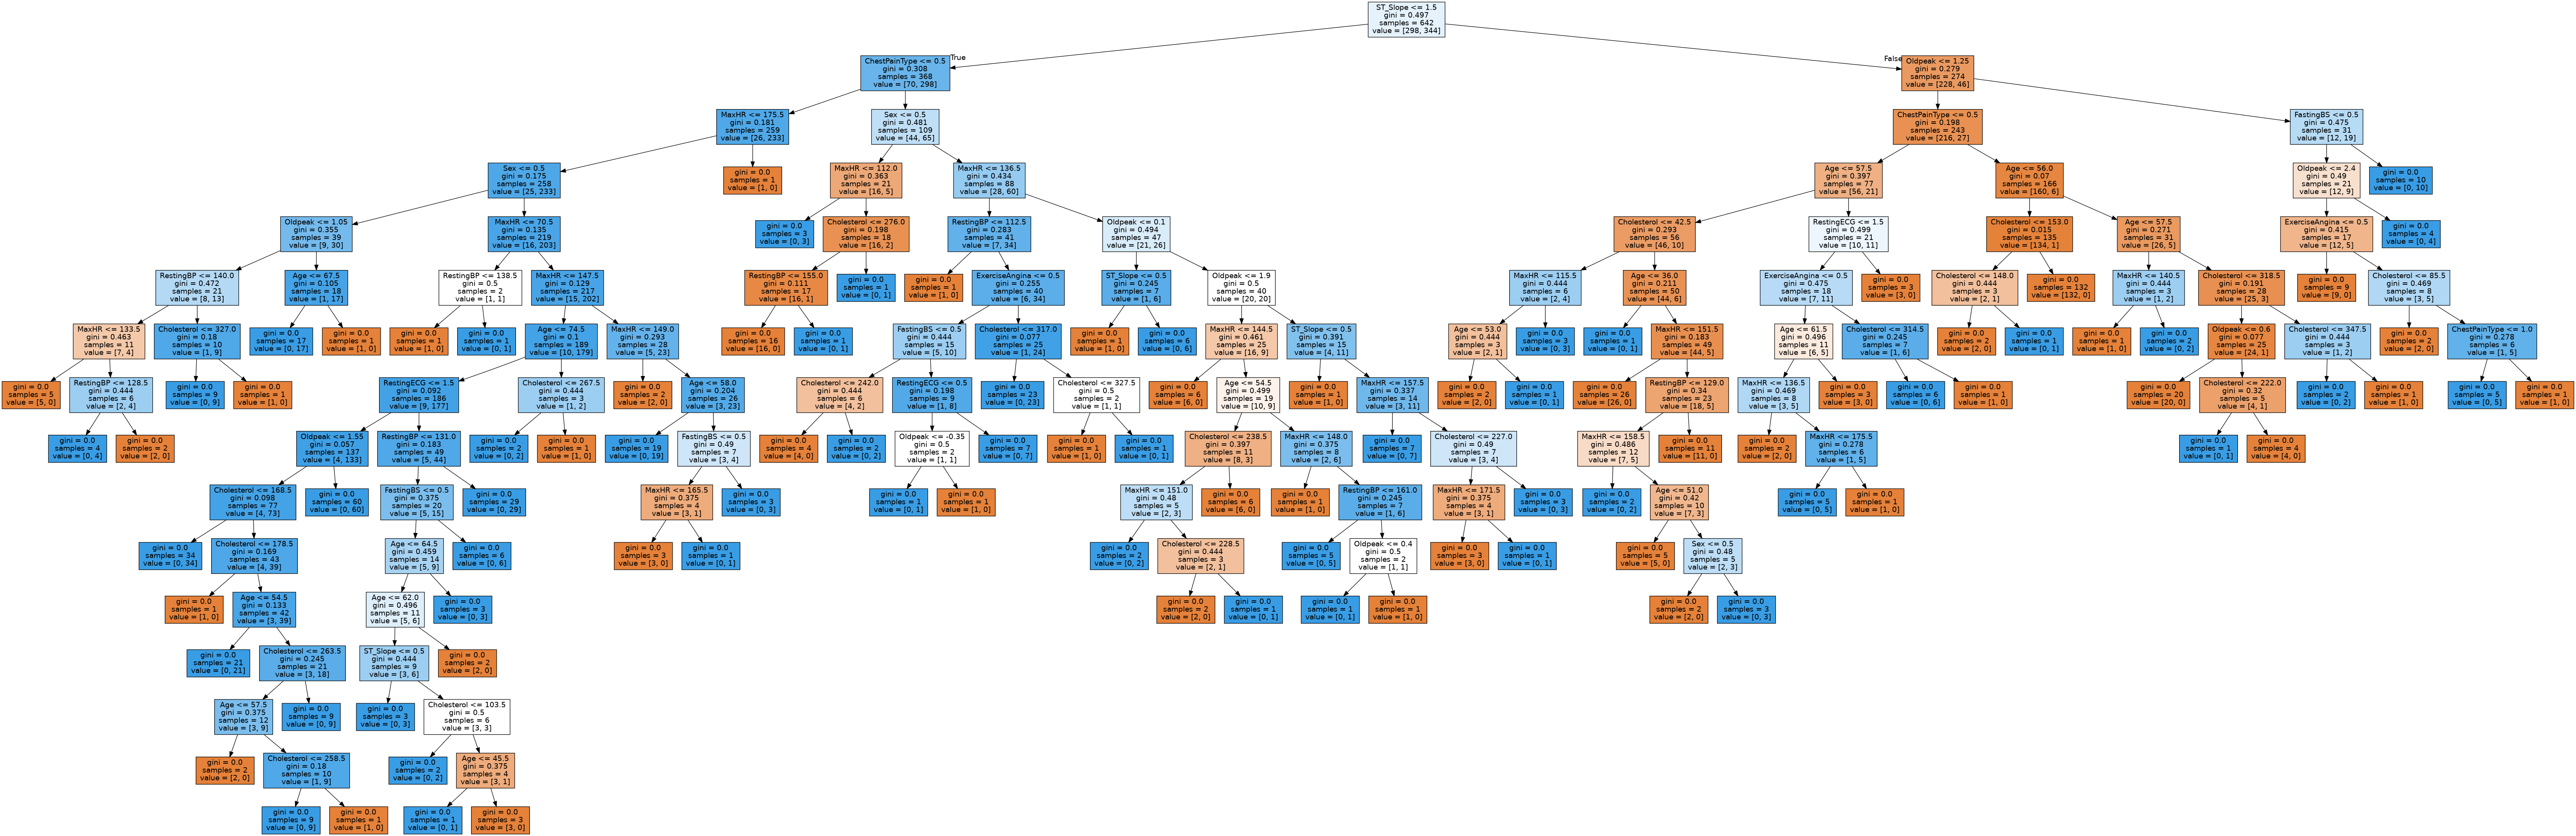

In [62]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())
